# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to Read Data and Return 2 Dataframes

In [2]:
def filereader(filename):
    data=open(filename,"r+").read() 
    data=data[85:]
    df=open("temp.csv","w+").write(data) 
    df=pd.read_csv("temp.csv")
    df=df.fillna(df.mean())
    yrcols=df.columns.tolist()[4:-1]
    df=df[(df['Indicator Name']=="Urban population")|((df['Indicator Name']=="CO2 emissions (kt)"))]
    global selcontry
    selcontry=["Argentina", "Brazil", "China", "France", "Iraq", "World"]
    fltr=df['Country Name'].isin(selcontry)
    df=df[fltr]
    #print(len(yrcols))
    cntry=df['Country Name'].tolist()
    ind=df['Indicator Name'].tolist()
    combined=[]
    for i in range(len(ind)):
        combined.append(cntry[i]+"-"+ind[i])
    df.insert(4,"Country with Indicator",combined)
    df1=df.T.iloc[4:][:-1]
    df=df.drop("Country with Indicator",axis=1)
    df1.columns=df1.iloc[0]
    df1=df1.iloc[1:]
    df1['Year']=yrcols
    df1=df1.set_index("Year")
    return df.reset_index(drop=True).drop(['Unnamed: 65','Country Code','Indicator Code'],axis=1),df1  

In [3]:
df,df1=filereader("API_19_DS2_en_csv_v2_3931355.csv")

In [4]:
df.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,Urban population,1.507684e+07,1.544995e+07,1.581550e+07,1.618309e+07,1.655252e+07,1.692310e+07,1.729521e+07,1.766909e+07,...,37543830.0,38027774.0,38509756.0,38990109.0,39467043.0,39940546.0,40410674.0,40877099.0,4.133957e+07,4.179699e+07
1,Argentina,CO2 emissions (kt),4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,...,177260.0,178530.0,184000.0,179910.0,186090.0,184280.0,180120.0,177410.0,3.435867e+07,4.320922e+07
2,Brazil,Urban population,3.330278e+07,3.501699e+07,3.680263e+07,3.866004e+07,4.058011e+07,4.255135e+07,4.457589e+07,4.665282e+07,...,167158531.0,169240747.0,171300683.0,173346780.0,175375428.0,177386817.0,179379296.0,181335496.0,1.832416e+08,1.850819e+08
3,Brazil,CO2 emissions (kt),4.690826e+04,4.920381e+04,5.369588e+04,5.561739e+04,5.673582e+04,5.639846e+04,6.430451e+04,6.619302e+04,...,417120.0,451760.0,482860.0,506780.0,479970.0,441910.0,449840.0,427710.0,3.435867e+07,4.320922e+07
4,China,Urban population,1.080854e+08,1.103279e+08,1.146855e+08,1.211622e+08,1.277920e+08,1.293484e+08,1.317469e+08,1.341967e+08,...,679390629.0,700996454.0,722694421.0,744357517.0,765822300.0,787376534.0,809246214.0,829760595.0,8.489829e+08,8.667057e+08


In [5]:
df1.head()   # second data with country column

Country with Indicator,Argentina-Urban population,Argentina-CO2 emissions (kt),Brazil-Urban population,Brazil-CO2 emissions (kt),China-Urban population,China-CO2 emissions (kt),France-Urban population,France-CO2 emissions (kt),Iraq-Urban population,Iraq-CO2 emissions (kt),World-Urban population,World-CO2 emissions (kt)
Year,,,,,,,,,,,,
1960,15076844.0,48815.104,33302777.0,46908.264,108085352.0,780726.302,28849501.0,271218.654,3127231.0,8265.418,1019029723.0,9463838.499902
1961,15449953.0,51180.319,35016989.0,49203.806,110327936.0,552066.85,29575876.0,281211.229,3321447.0,8720.126,1047559112.0,9423934.423683
1962,15815495.0,53695.881,36802627.0,53695.881,114685540.0,440359.029,30414329.0,298706.486,3528451.0,9031.821,1079414304.0,9732505.890225
1963,16183088.0,50083.886,38660040.0,55617.389,121162226.0,436695.696,31433929.0,334019.696,3749757.0,9394.854,1114226228.0,10274503.991073
1964,16552518.0,55727.399,40580114.0,56735.824,127791981.0,436923.05,32441971.0,345303.055,3987431.0,9075.825,1149870744.0,10820253.007307


# Data Analysis

In [6]:
i1,i2=[],[]
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(selcontry)):
    dft=df[df['Country Name']==selcontry[i]]
    dft=dft.drop('Indicator Name',axis=1)
    print("               Statistics for {}".format(selcontry[i]))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average Urban population for {} => {}".format(selcontry[i],round(dft.iloc[0,1:].mean(),2)))
    print("Average CO2 emissions for {} => {}".format(selcontry[i],round(dft.iloc[1,1:].mean(),2)))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    i1.append(round(dft.iloc[0,1:].mean(),2))
    i2.append(round(dft.iloc[1,1:].mean(),2))
statdf=pd.DataFrame({"Country":selcontry,"Urban Population":i1,"CO2 emissions":i2})
statdf=statdf.sort_values(by="Urban Population")
statdf

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for Argentina
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Average Urban population for Argentina => 28127435.48
Average CO2 emissions for Argentina => 1384089.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for Brazil
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Average Urban population for Brazil => 109639680.82
Average CO2 emissions for Brazil => 1496476.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for China
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Average Urban population for China => 372573790.61
Average CO2 emissions for China => 4627158.44
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               Statistics for France
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Average Urban population for Fr

,Country,Urban Population,CO2 emissions
4,Iraq,1.323262e+07,1338405.43
0,Argentina,2.812744e+07,1384089.00
3,France,4.333441e+07,1642996.23
1,Brazil,1.096397e+08,1496476.02
2,China,3.725738e+08,4627158.44
5,World,2.411238e+09,22270442.62


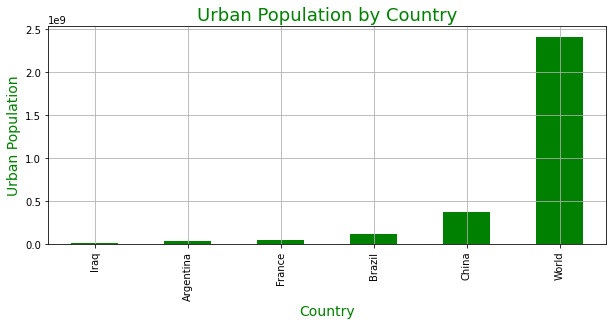

In [7]:
statdf=statdf.set_index("Country")
statdf.iloc[:,0].plot(kind="bar",color="g",figsize=(10,4))
plt.title("Urban Population by Country",fontsize=18,color="g")
plt.xlabel("Country",fontsize=14,color="g")
plt.ylabel("Urban Population",fontsize=14,color="g")
plt.grid()
plt.show()

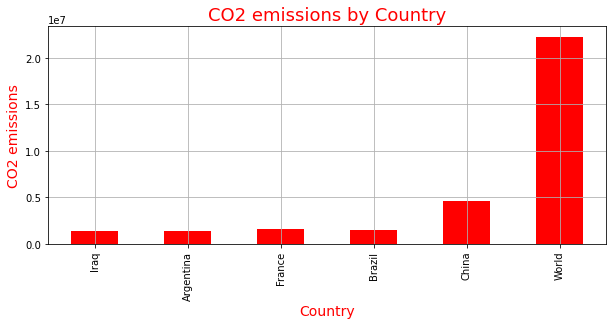

In [8]:
statdf.iloc[:,1].plot(kind="bar",color="r",figsize=(10,4))
plt.title("CO2 emissions by Country",fontsize=18,color="r")
plt.xlabel("Country",fontsize=14,color="r")
plt.ylabel("CO2 emissions",fontsize=14,color="r")
plt.grid()
plt.show()

In [9]:
df1cols=df1.columns
df1idx=df1.index
df1arr=np.array(df1.values,float)
df1=pd.DataFrame(df1arr,columns=df1cols,index=df1idx)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1960 to 2020
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Argentina-Urban population    61 non-null     float64
 1   Argentina-CO2 emissions (kt)  61 non-null     float64
 2   Brazil-Urban population       61 non-null     float64
 3   Brazil-CO2 emissions (kt)     61 non-null     float64
 4   China-Urban population        61 non-null     float64
 5   China-CO2 emissions (kt)      61 non-null     float64
 6   France-Urban population       61 non-null     float64
 7   France-CO2 emissions (kt)     61 non-null     float64
 8   Iraq-Urban population         61 non-null     float64
 9   Iraq-CO2 emissions (kt)       61 non-null     float64
 10  World-Urban population        61 non-null     float64
 11  World-CO2 emissions (kt)      61 non-null     float64
dtypes: float64(12)
memory usage: 6.2+ KB


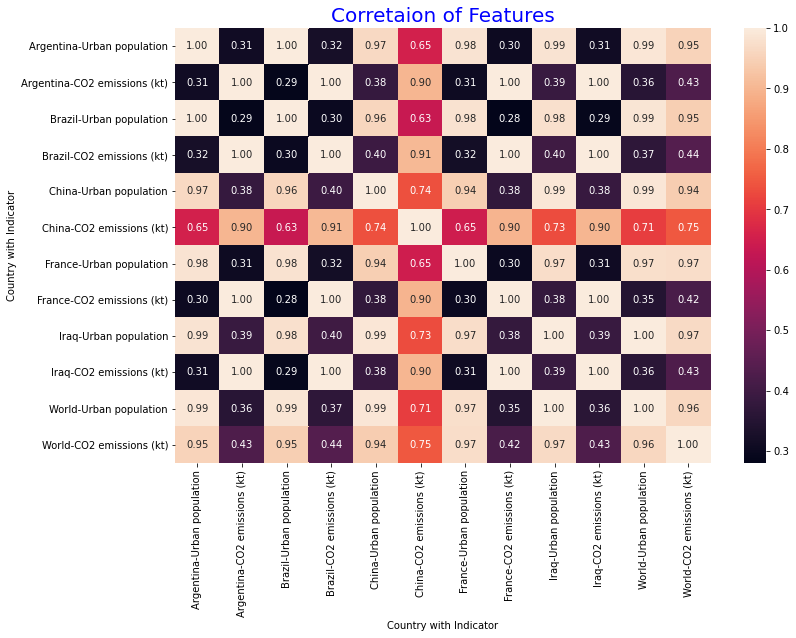

In [10]:
plt.figure(figsize=(12,8))
plt.title("Corretaion of Features",fontsize=20,color="b")
sns.heatmap(df1.corr(),annot=True,fmt="0.2f")
plt.show()

<Figure size 576x288 with 0 Axes>

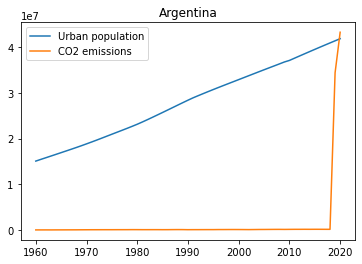

<Figure size 576x288 with 0 Axes>

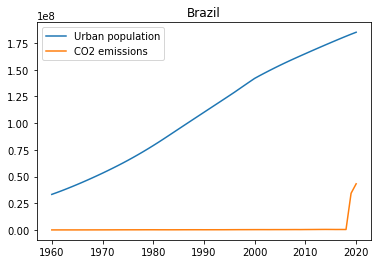

<Figure size 576x288 with 0 Axes>

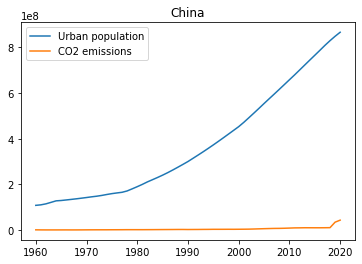

<Figure size 576x288 with 0 Axes>

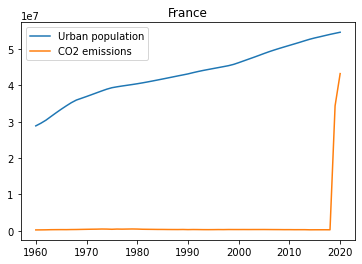

<Figure size 576x288 with 0 Axes>

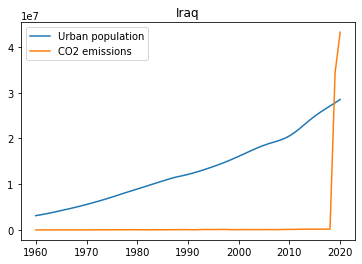

<Figure size 576x288 with 0 Axes>

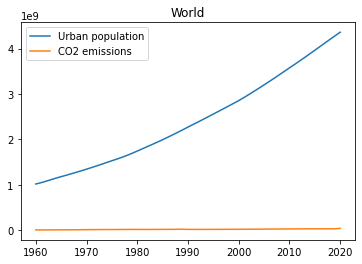

In [11]:
for i in range(len(selcontry)):
    dft=df[df['Country Name']==selcontry[i]]
    dft=dft.drop('Indicator Name',axis=1)
    cls=["Urban population","CO2 emissions"]
    dft1=dft.T
    dft1.columns=cls
    dft1=dft1.iloc[1:]
    plt.figure(figsize=(8,4))
    dft1.plot(kind='line')
    plt.title("{}".format(selcontry[i]))
    plt.show()